In [9]:
%pip install pyarrow pandas

   ---------------------------------------- 0.0/25.7 MB ? eta -:--:--
   ------------ --------------------------- 7.9/25.7 MB 37.4 MB/s eta 0:00:01
   -------------------------------- ------- 21.0/25.7 MB 49.1 MB/s eta 0:00:01
   ---------------------------------------  25.4/25.7 MB 46.0 MB/s eta 0:00:01
   ---------------------------------------- 25.7/25.7 MB 36.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install lightgbm


  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import glob


In [3]:
import os
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

Current working directory: c:\Users\felic\Downloads\MicronDataChallenge


In [11]:
# List all Parquet files in a directory
file_list = glob.glob("./train/metrology_data*.parquet")

# Read and concatenate all Parquet files
meas_df = pd.concat([pd.read_parquet(file) for file in file_list])

# Save to a new Parquet file
meas_df.to_parquet("meas_combined.parquet", index=False)

In [12]:
# List all Parquet files in a directory
file_list = glob.glob("./train/run_data_*.parquet")

# Read and concatenate all Parquet files
run_df = pd.concat([pd.read_parquet(file) for file in file_list])

# Save to a new Parquet file
run_df.to_parquet("run_combined.parquet", index=False)

In [13]:
# List all Parquet files in a directory
file_list = glob.glob("./train/incoming_run_data_*.parquet")

# Read and concatenate all Parquet files
incom_df = pd.concat([pd.read_parquet(file) for file in file_list])

# Save to a new Parquet file
incom_df.to_parquet("incom_run_combined.parquet", index=False)

In [4]:
meas_df      = pd.read_parquet("meas_combined.parquet")

In [5]:
incom_run_df  = pd.read_parquet("incom_run_combined.parquet")

In [6]:
run_df       = pd.read_parquet("run_combined.parquet")

In [7]:
print(f"Runs: {run_df.shape}, Incoming Runs: {incom_run_df.shape}, Measurements: {meas_df.shape}")

Runs: (41220750, 10), Incoming Runs: (82896506, 9), Measurements: (202860, 9)


In [8]:
run_df.head()

,Tool ID,Run Start Time,Run End Time,Run ID,Process Step,Consumable Life,Step ID,Time Stamp,Sensor Name,Sensor Value
0,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:00.000000000,Sensor_A,-0.061105
1,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:01.000000002,Sensor_A,-0.040894
2,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:01.999999997,Sensor_A,0.005357
3,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:03.000000000,Sensor_A,-0.029941
4,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:04.000000002,Sensor_A,-0.098098


In [9]:
print(run_df.columns.tolist())

['Tool ID', 'Run Start Time', 'Run End Time', 'Run ID', 'Process Step', 'Consumable Life', 'Step ID', 'Time Stamp', 'Sensor Name', 'Sensor Value']


In [10]:
incom_run_df.head()

,Tool ID,Run Start Time,Run End Time,Run ID,Process Step,Step ID,Time Stamp,Sensor Name,Sensor Value
0,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2023-12-31,2023-12-31 00:12:22,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,Step_0,2023-12-31 00:00:00.000000000,Sensor_1,202.660553
1,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2023-12-31,2023-12-31 00:12:22,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,Step_0,2023-12-31 00:00:01.000000002,Sensor_1,202.660553
2,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2023-12-31,2023-12-31 00:12:22,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,Step_0,2023-12-31 00:00:01.999999997,Sensor_1,202.660553
3,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2023-12-31,2023-12-31 00:12:22,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,Step_1,2023-12-31 00:00:03.000000000,Sensor_1,202.660553
4,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2023-12-31,2023-12-31 00:12:22,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,Step_1,2023-12-31 00:00:04.000000002,Sensor_1,202.660553


In [11]:
print(incom_run_df.columns.tolist())

['Tool ID', 'Run Start Time', 'Run End Time', 'Run ID', 'Process Step', 'Step ID', 'Time Stamp', 'Sensor Name', 'Sensor Value']


upper limit: 957990.5
lower limit: -956559.25


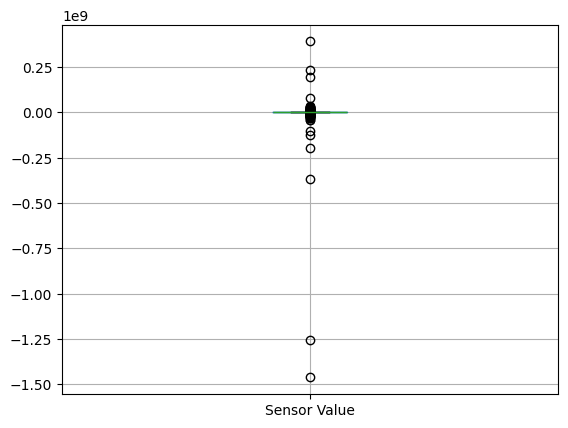

In [ ]:
run_df.boxplot(column='Sensor Value')

In [12]:
upper_limit = run_df['Sensor Value'].mean() + 3*run_df['Sensor Value'].std()
lower_limit = run_df['Sensor Value'].mean() - 3*run_df['Sensor Value'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 957990.5
lower limit: -956559.25


In [13]:
# find the outliers
run_df.loc[(run_df['Sensor Value'] > upper_limit) | (run_df['Sensor Value'] < lower_limit)]

,Tool ID,Run Start Time,Run End Time,Run ID,Process Step,Consumable Life,Step ID,Time Stamp,Sensor Name,Sensor Value
372210,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01 11:25:45,2024-01-01 11:38:20,a0968331-8fd8-55fd-b7a0-3f216e33f22b,22c8716b-1c14-525a-8c0a-0473ec7aa99e,120.655685,Step_1,2024-01-01 11:26:34.999999998,Sensor_B,-1.597879e+06
518988,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01 17:02:05,2024-01-01 17:14:40,7a61466c-f2d0-51a3-b236-58da9b7a488e,22c8716b-1c14-525a-8c0a-0473ec7aa99e,446.004089,Step_11,2024-01-01 17:11:35.000000000,Sensor_B,-1.187834e+06
569096,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01 19:22:45,2024-01-01 19:35:20,4a00d9ab-bf75-54e9-a5ad-be2604d770eb,22c8716b-1c14-525a-8c0a-0473ec7aa99e,164.678192,Step_1,2024-01-01 19:23:12.000000000,Sensor_B,-9.860918e+05
1163240,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-02 14:45:30,2024-01-02 14:58:05,36abd95a-3f82-537a-900d-b1e5345a1eac,22c8716b-1c14-525a-8c0a-0473ec7aa99e,61.244125,Step_3,2024-01-02 14:46:54.000000000,Sensor_B,-2.247293e+06
1230513,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-02 17:06:10,2024-01-02 17:18:45,7ff87464-2ebe-56e5-be0d-405f4f375f07,22c8716b-1c14-525a-8c0a-0473ec7aa99e,399.150696,Step_1,2024-01-02 17:07:02.999999998,Sensor_B,-3.275523e+06
...,...,...,...,...,...,...,...,...,...,...
40710911,5116a75f-0543-502f-8278-2b2496d337d2,2024-01-03 10:43:25,2024-01-03 10:56:00,ef9e4594-33b6-5c24-b65d-a71a31b0b31f,22c8716b-1c14-525a-8c0a-0473ec7aa99e,428.230469,Step_10,2024-01-03 10:52:35.999999998,Sensor_B,-2.313108e+06
40730225,5116a75f-0543-502f-8278-2b2496d337d2,2024-01-03 11:18:35,2024-01-03 11:31:10,79724af4-287e-5992-bef0-30d3a871645a,22c8716b-1c14-525a-8c0a-0473ec7aa99e,60.009438,Step_1,2024-01-03 11:19:30.000000002,Sensor_B,-1.980364e+08
40749552,5116a75f-0543-502f-8278-2b2496d337d2,2024-01-03 12:11:20,2024-01-03 12:23:55,0a3cb5ff-5e22-5c47-9e24-ca7fed172819,22c8716b-1c14-525a-8c0a-0473ec7aa99e,361.384338,Step_3,2024-01-03 12:13:17.000000000,Sensor_B,1.751143e+06
40801157,5116a75f-0543-502f-8278-2b2496d337d2,2024-01-03 14:34:15,2024-01-03 14:46:50,41549e49-a08f-5e95-abef-6b24ff43ba1d,22c8716b-1c14-525a-8c0a-0473ec7aa99e,264.022980,Step_10,2024-01-03 14:45:04.999999998,Sensor_B,-2.209042e+06


In [14]:
# trimming - delete the outlier data
new_df = run_df.loc[(run_df['Sensor Value'] <= upper_limit) & (run_df['Sensor Value'] >= lower_limit)]
print('before removing outliers:', len(run_df))
print('after removing outliers:',len(new_df))
print('outliers:', len(run_df)-len(new_df))

before removing outliers: 41220750
after removing outliers: 41220083
outliers: 667


<Axes: >

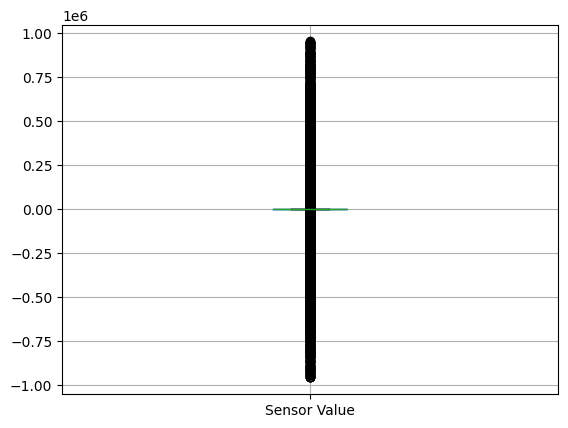

In [15]:
new_df.boxplot(column='Sensor Value')

In [16]:
new_df['Time_utc'] = pd.to_datetime(run_df['Time Stamp'])
new_df.head()

C:\Users\felic\AppData\Local\Temp\ipykernel_19792\3909614850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Time_utc'] = pd.to_datetime(run_df['Time Stamp'])


,Tool ID,Run Start Time,Run End Time,Run ID,Process Step,Consumable Life,Step ID,Time Stamp,Sensor Name,Sensor Value,Time_utc
0,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:00.000000000,Sensor_A,-0.061105,2024-01-01 00:00:00.000000000
1,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:01.000000002,Sensor_A,-0.040894,2024-01-01 00:00:01.000000002
2,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:01.999999997,Sensor_A,0.005357,2024-01-01 00:00:01.999999997
3,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:03.000000000,Sensor_A,-0.029941,2024-01-01 00:00:03.000000000
4,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:04.000000002,Sensor_A,-0.098098,2024-01-01 00:00:04.000000002


In [17]:
print(new_df['Run ID'].value_counts())
print(new_df['Tool ID'].value_counts())
print(new_df['Process Step'].value_counts())
print(new_df['Step ID'].value_counts())
print(new_df['Sensor Name'].value_counts())

Run ID
3c2e0ee4-66ab-54b2-a15b-539f0dd53218    10995
820581b0-e0e6-5eec-bddb-17bee6c4bafa    10995
1483d37a-520e-5851-96eb-b8a22234b7c9    10995
0b303820-4363-5f8d-8a8f-fb58dc4a7507    10995
a3ac112f-76ce-573b-bf2b-0e81866e5bfb    10995
                                        ...  
090e57ae-a92b-531c-820a-26c03442e740     8835
a7e71d30-68a0-5126-878c-9425410bd4b0     8834
6d1d9044-e58a-5fea-82bb-43bdecfd8f1b     8834
7bbd85d0-2284-5b81-90dc-01464cf8a6d3     8834
f86ea588-4174-5557-94b9-2a83c66f2eaf     8834
Name: count, Length: 4140, dtype: int64
Tool ID
5116a75f-0543-502f-8278-2b2496d337d2    2253072
1914935a-df63-54c2-9c47-da905244e631    2251319
bb7e0385-0227-575a-9894-dacc8bf07f2a    2249406
683e5405-4b93-5160-be90-d3d5b0d9287a    2248115
4738fd3d-8fc7-59fd-85a7-eec6efb4bfae    2246728
db66ded5-0f4f-5179-b8e7-4673304ddff1    2244822
e4838ac1-3788-50bf-bbca-04cf339ec369    2244402
b3439d8e-290b-59a4-96a5-53348288f6a9    2241613
08e35986-3a0a-5274-8990-4ad303be9d5f    2241609
8060e8e

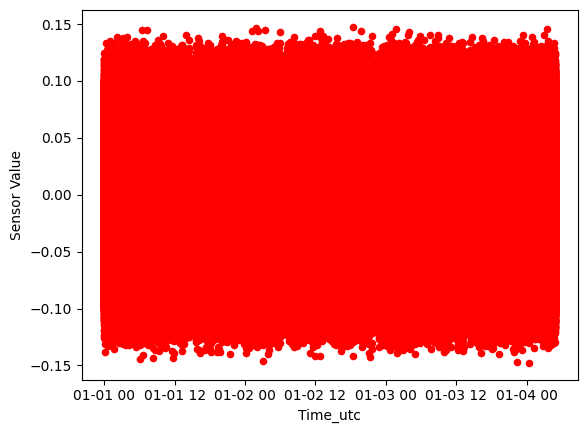

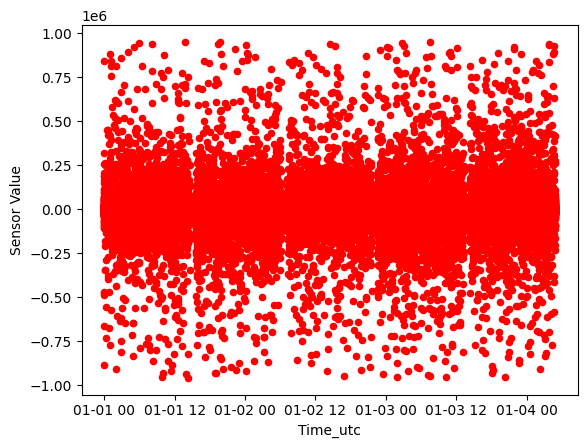

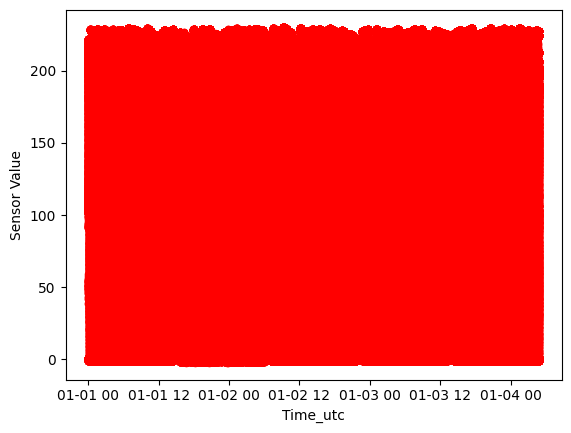

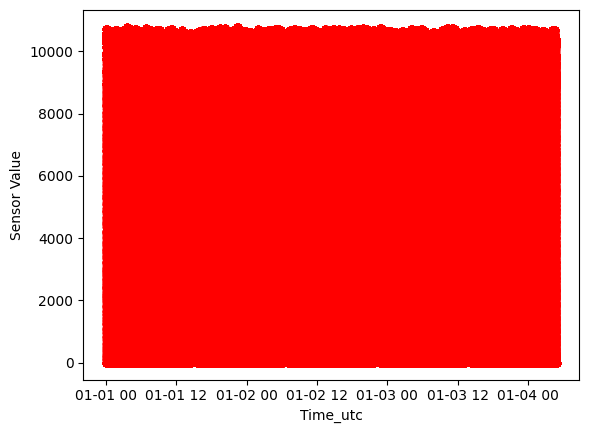

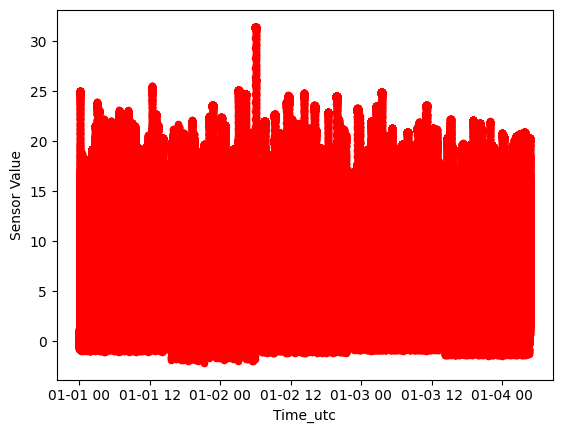

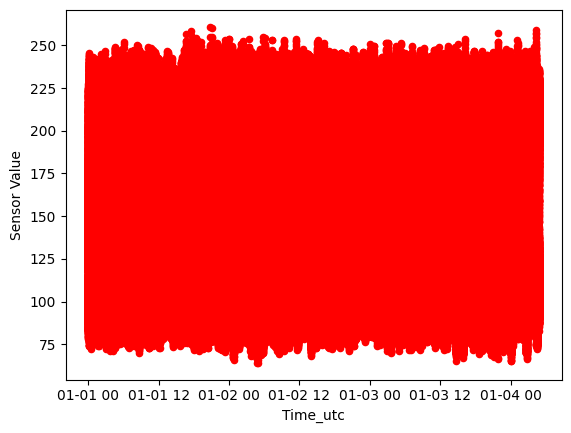

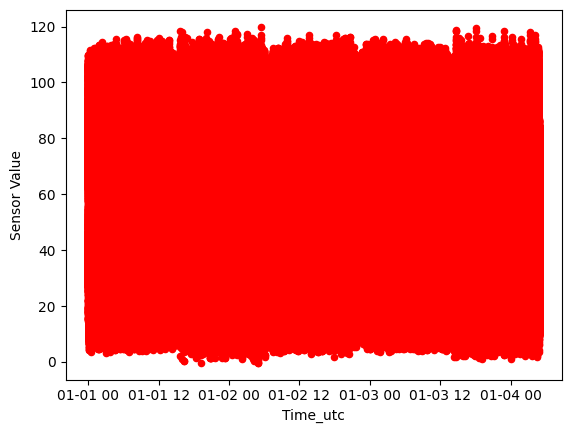

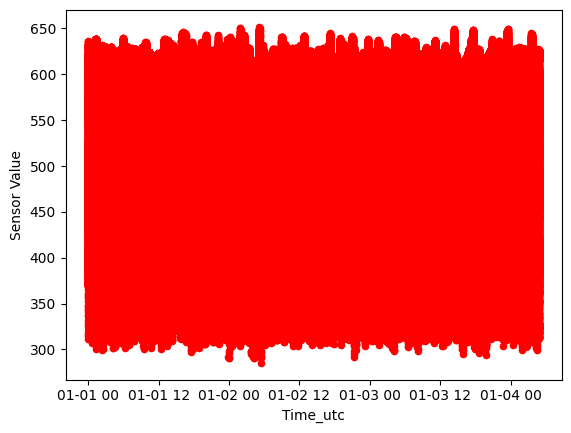

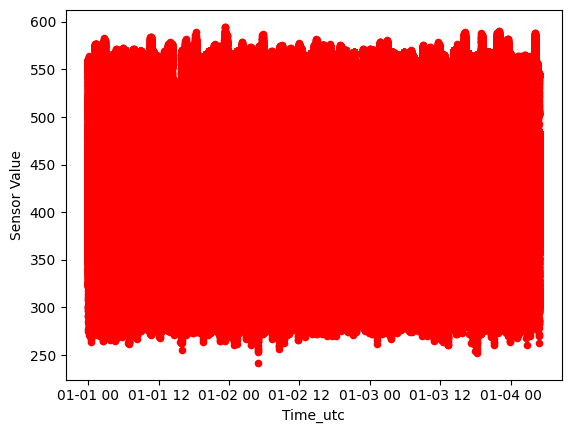

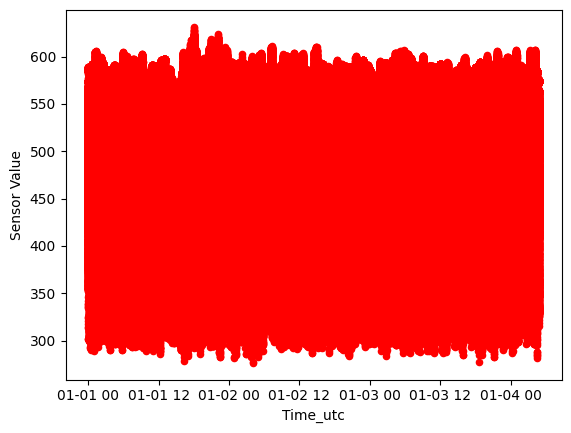

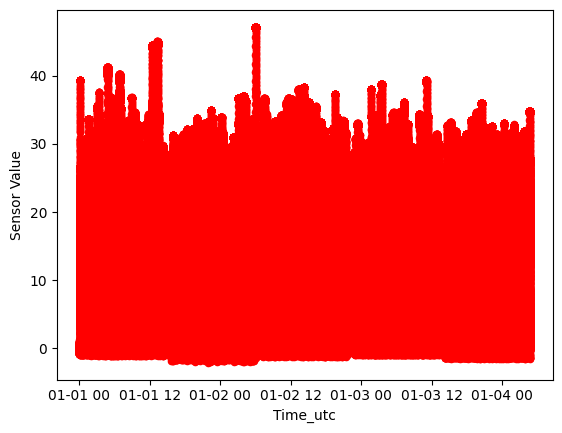

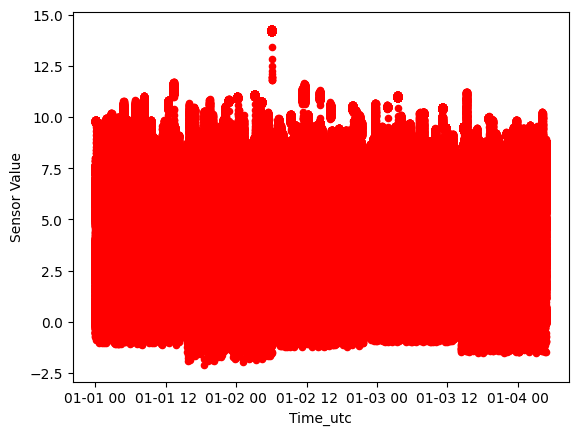

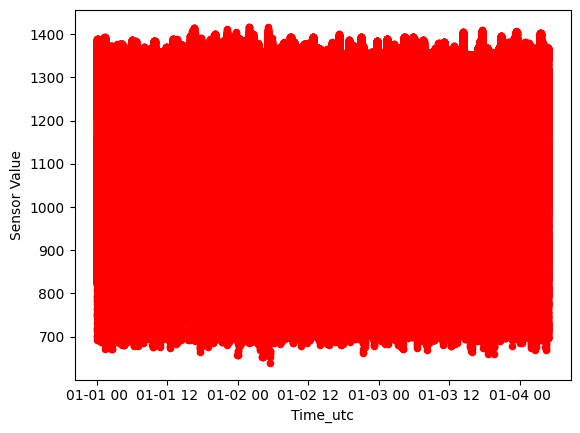

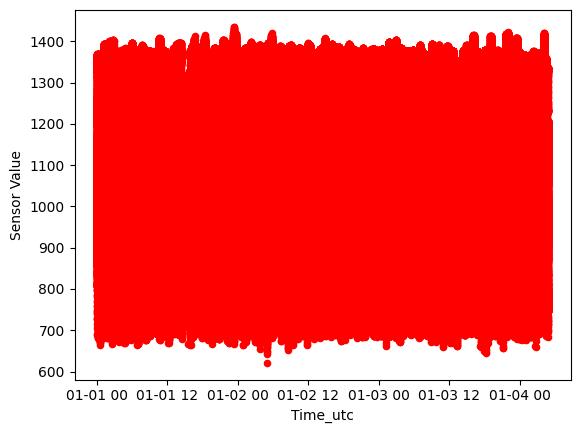

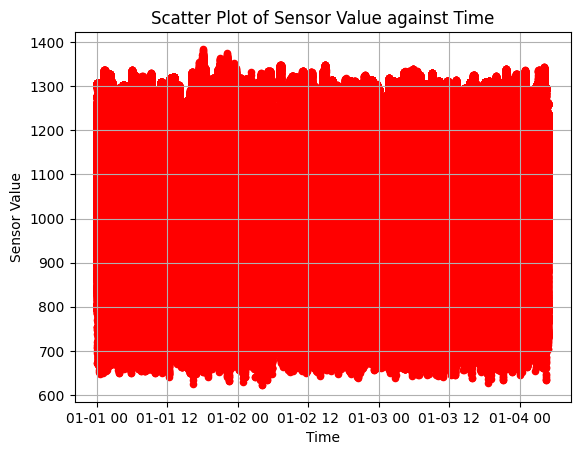

In [18]:
import matplotlib.pyplot as plt

new_df.groupby('Sensor Name').plot(x='Time_utc', y='Sensor Value', kind='scatter', color='red') # s = marker size
plt.title('Scatter Plot of Sensor Value against Time')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.grid(True)
plt.show()

In [19]:
meas_df.head()

,Run ID,Run Start Time,Run End Time,X_index,Y_index,X,Y,Point Index,Measurement
0,00862337-2cc0-5b34-b5e1-45588e935c39,2024-01-02 04:45:25,2024-01-02 04:58:00,1,23,-143.877551,-9.183673,3,10.006534
1,00862337-2cc0-5b34-b5e1-45588e935c39,2024-01-02 04:45:25,2024-01-02 04:58:00,1,29,-143.877551,27.551020,48,10.002181
2,00862337-2cc0-5b34-b5e1-45588e935c39,2024-01-02 04:45:25,2024-01-02 04:58:00,2,34,-137.755102,58.163265,43,10.031223
3,00862337-2cc0-5b34-b5e1-45588e935c39,2024-01-02 04:45:25,2024-01-02 04:58:00,3,14,-131.632653,-64.285714,20,10.055888
4,00862337-2cc0-5b34-b5e1-45588e935c39,2024-01-02 04:45:25,2024-01-02 04:58:00,5,39,-119.387755,88.775510,8,10.089505


In [20]:
print(meas_df.columns.tolist())

['Run ID', 'Run Start Time', 'Run End Time', 'X_index', 'Y_index', 'X', 'Y', 'Point Index', 'Measurement']


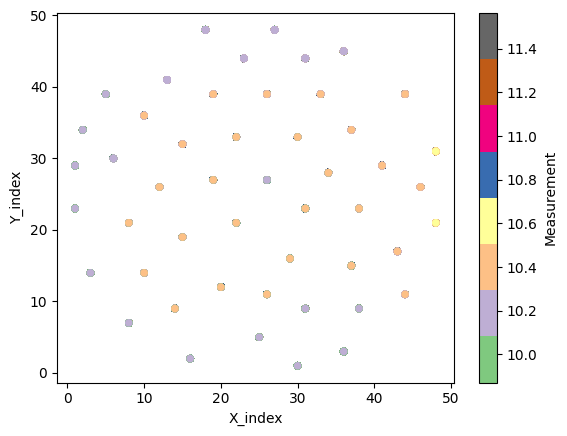

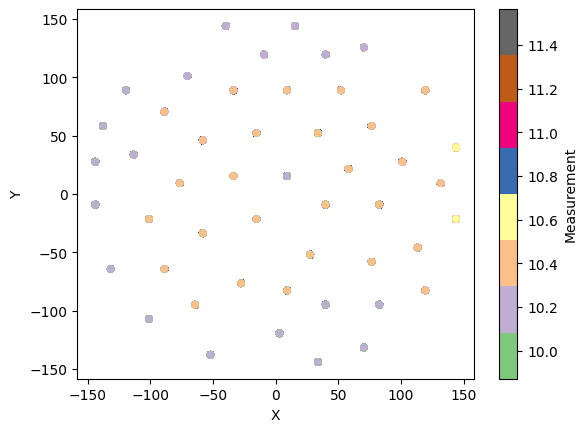

In [42]:
# Create the contour plot
ax2 = meas_df.plot.scatter(x='X',
                           y='Y',
                           c='Measurement',
                           colormap='Accent')
plt.show()

In [22]:
# Create a 'run_duration' feature by calculating the difference between 'start_time_utc' and 'end_time_utc'
new_df['start_time_utc'] = pd.to_datetime(new_df['Run Start Time'])
new_df['end_time_utc'] = pd.to_datetime(new_df['Run End Time'])
new_df['run_duration'] = (new_df['end_time_utc'] - new_df['start_time_utc']).dt.total_seconds()

print(new_df.head())

C:\Users\felic\AppData\Local\Temp\ipykernel_19792\2110943921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['start_time_utc'] = pd.to_datetime(new_df['Run Start Time'])
C:\Users\felic\AppData\Local\Temp\ipykernel_19792\2110943921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['end_time_utc'] = pd.to_datetime(new_df['Run End Time'])


                                Tool ID Run Start Time        Run End Time  \
0  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2024-01-01 2024-01-01 00:12:35   
1  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2024-01-01 2024-01-01 00:12:35   
2  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2024-01-01 2024-01-01 00:12:35   
3  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2024-01-01 2024-01-01 00:12:35   
4  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2024-01-01 2024-01-01 00:12:35   

                                 Run ID                          Process Step  \
0  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   
1  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   
2  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   
3  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   
4  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   

   Consumable Life Step ID                  

C:\Users\felic\AppData\Local\Temp\ipykernel_19792\2110943921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['run_duration'] = (new_df['end_time_utc'] - new_df['start_time_utc']).dt.total_seconds()


In [23]:
# 2. Feature engineering on run_df
# 2a. Aggregate each sensor’s time series per run into summary stats
agg_funcs = ["mean", "std", "min", "max"]
sensor_feats = (
    new_df
      .groupby(["Run ID", "Sensor Name"])["Sensor Value"]
      .agg(agg_funcs)
      .unstack(fill_value=0)
)
# flatten column MultiIndex
sensor_feats.columns = [
    f"{sensor}_{stat}" for sensor, stat in sensor_feats.columns
]
sensor_feats.reset_index(inplace=True)

In [24]:
#print(sensor_feats.head())

In [25]:
# 2b. Tool-life feature: max ConsumableLife per run
life_feat = (
    new_df
      .groupby("Run ID")["Consumable Life"]
      .max()
      .rename("ConsumableLifeMax")
      .reset_index()
)

# merge features
feat = sensor_feats.merge(life_feat, on="Run ID")

In [26]:
#print(feat.head())

In [27]:
# 2. Feature engineering on run_df
# 2c. Aggregate each tool's time series per run into summary stats
agg_funcs = ["mean", "std", "min", "max"]
tool_feats = (
    new_df
      .groupby(["Run ID", "Tool ID"])["Sensor Value"]
      .agg(agg_funcs)
      .unstack(fill_value=0)
)
# flatten column MultiIndex
tool_feats.columns = [
    f"{tool}_tool_{stat}" for tool, stat in tool_feats.columns
]

tool_feats.reset_index(inplace=True)
feat = feat.merge(tool_feats, on="Run ID")

In [28]:
#print(feat.head())

In [29]:
# 2. Feature engineering on run_df
# 2d. Aggregate each process's series per run into summary stats
agg_funcs = ["mean", "std", "min", "max"]
proc_feats = (
    new_df
      .groupby(["Run ID", "Process Step"])["Sensor Value"]
      .agg(agg_funcs)
      .unstack(fill_value=0)
)
# flatten column MultiIndex
proc_feats.columns = [
    f"{proc}_proc_{stat}" for proc, stat in proc_feats.columns
]

tool_feats.reset_index(inplace=True)
feat = feat.merge(proc_feats, on="Run ID")

In [30]:
#print(feat.head())

In [31]:
# 2. Feature engineering on run_df
# 2e. Aggregate each step’s time series per run into summary stats
agg_funcs = ["mean", "std", "min", "max"]
step_feats = (
    new_df
      .groupby(["Run ID", "Step ID"])["Sensor Value"]
      .agg(agg_funcs)
      .unstack(fill_value=0)
)
# flatten column MultiIndex
step_feats.columns = [
    f"{step}_{stat}" for step, stat in step_feats.columns
]

step_feats.reset_index(inplace=True)
feat = feat.merge(step_feats, on="Run ID")

In [32]:
#print(feat.head())

In [33]:
#Add incoming run sensor values
agg_funcs = ["mean", "std", "min", "max"]
incoming_feats = (
    incom_run_df
      .groupby(["Run ID", "Sensor Name"])["Sensor Value"]
      .agg(agg_funcs)
      .unstack(fill_value=0)
)
# flatten column MultiIndex
incoming_feats.columns = [
    f"{sensor}_incoming_{stat}" for sensor, stat in incoming_feats.columns
]
incoming_feats.reset_index(inplace=True)
feat = feat.merge(incoming_feats, on="Run ID")

In [34]:
#print(feat.head())

In [35]:
# # Add categorical features from original run_df before dropping
# categorical_cols = ['Tool ID', 'Process Step', 'Step ID']
# for col in categorical_cols:
#   if col in run_df.columns:
#     feat = feat.merge(run_df[['Run ID', col]].drop_duplicates(), on='Run ID', how='left')

# Add the engineered run_duration feature
feat = feat.merge(new_df[['Run ID', 'run_duration']].drop_duplicates(), on='Run ID', how='left')

print("\nFeatures dataframe after engineering:")
print(feat.head())
print(feat.columns.tolist())


Features dataframe after engineering:
                                 Run ID  mean_Sensor_A  mean_Sensor_B  \
0  000f424f-667d-54a2-bbbd-9624c4071465       0.001230    -428.069183   
1  001466b9-ee4c-5642-8e93-0a501ce4e9d9       0.000596    -133.897141   
2  002d6c65-b86f-5153-a2d8-206e59da6307       0.001283     394.936554   
3  002fdc18-a36b-5188-a5e3-9e1d59697a6b      -0.002384     -23.619997   
4  004379ac-3743-5811-bb3b-d1821813b2d2      -0.000876     133.647980   

   mean_Sensor_C  mean_Sensor_D  mean_Sensor_E  mean_Sensor_F  mean_Sensor_G  \
0     104.422707    5820.641602       8.797877     120.705505      61.893738   
1     114.544716    6893.712402      10.528492     128.731644      54.082806   
2      92.291214    6344.273438       8.530919     123.559006      65.221832   
3      95.550697    6334.035645       7.551556     124.874435      63.301517   
4     111.237801    6592.873047       7.699797     125.464149      53.037315   

   mean_Sensor_H  mean_Sensor_I  ...  max

In [36]:
# 3. Combine with measurement targets
df = meas_df.merge(feat, on="Run ID", how="left")

# drop any runs with missing features (if any)
df.dropna(inplace=True)

In [37]:
#print(df.head())

In [38]:
print(df.dtypes)

Run ID                           object
Run Start Time           datetime64[ns]
Run End Time             datetime64[ns]
X_index                           int32
Y_index                           int32
                              ...      
max_incoming_Sensor_6           float32
max_incoming_Sensor_7           float32
max_incoming_Sensor_8           float32
max_incoming_Sensor_9           float32
run_duration                    float64
Length: 367, dtype: object


In [39]:
# # Create a categorical feature from 'run_type'
# df['Tool_ID_encoded'] = df['Tool ID'].astype('category').cat.codes
# df['Process_Step_encoded'] = df['Process Step'].astype('category').cat.codes
# df['Step_ID_encoded'] = df['Step ID'].astype('category').cat.codes

In [40]:
# df = df.drop(columns=['Tool ID', 'Process Step', 'Step ID'])
# print(df.dtypes)

In [ ]:
corr_matrix = df.corr(numeric_only=True)["Measurement"].sort_values(ascending=False)

Measurement          1.000000
mean_Sensor_N        0.755044
std_Sensor_N         0.752535
min_Sensor_N         0.749013
max_Sensor_N         0.741277
                       ...   
ConsumableLifeMax   -0.067809
std_Sensor_E        -0.200163
mean_Sensor_E       -0.201605
max_Sensor_E        -0.206962
run_duration              NaN
Name: Measurement, Length: 364, dtype: float64


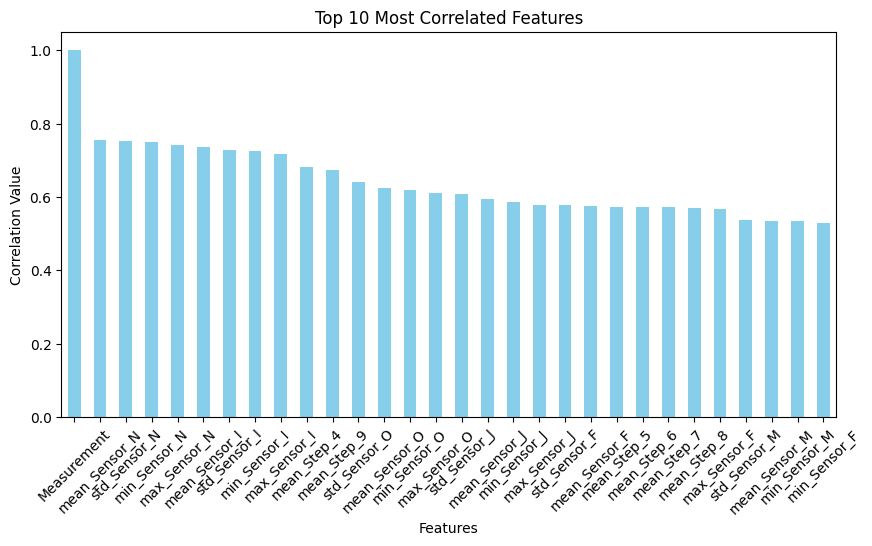

In [ ]:
# Select top 30 most correlated features (excluding "Measurement" if needed)
top_10 = corr_matrix.nlargest(30)

# Plot bar chart
plt.figure(figsize=(10, 5))
top_10.plot(kind="bar", color="skyblue")
plt.xlabel("Features")
plt.ylabel("Correlation Value")
plt.title("Top 10 Most Correlated Features")
plt.xticks(rotation=45)
plt.show()

In [43]:
# 4. Train/validation split
X = df.drop(columns=["Run ID", "Measurement"])
y = df["Measurement"]
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [44]:
# 5. Hyperparameter tuning with LightGBM
lgbm = lgb.LGBMRegressor(random_state=42)
param_grid = {
    "num_leaves":    [31, 63],
    "learning_rate": [0.1, 0.01],
    "n_estimators":  [100, 300]
}
grid = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=3,
    verbose=1,
    n_jobs=-1
)


In [45]:
# Check for datetime columns
datetime_cols = X_train.select_dtypes(include=["datetime64"]).columns
print("Datetime columns:", list(datetime_cols))

Datetime columns: ['Run Start Time', 'Run End Time']


In [46]:
# Drop datetime columns from both train and val
X_train = X_train.drop(columns=datetime_cols)
X_val = X_val.drop(columns=datetime_cols)

In [47]:
X = X.drop(columns=datetime_cols)

In [48]:
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Users\felic\miniconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\felic\miniconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\felic\miniconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\felic\miniconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\felic\miniconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.Crea

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.147436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 88470
[LightGBM] [Info] Number of data points in the train set: 162288, number of used features: 362
[LightGBM] [Info] Start training from score 10.224046
Best params: {'learning_rate': 0.1, 'n_estimators': 300, 'num_leaves': 63}


In [49]:
# 6. Evaluate on validation set
best_model = grid.best_estimator_
pred_val = best_model.predict(X_val)

In [50]:
val_rmse = mean_squared_error(y_val, pred_val)
print(f"Validation RMSE: {val_rmse:.4f}")

Validation RMSE: 0.0004


In [51]:
pred_val_df = pd.DataFrame({'Actual': y_val, 'Predicted': pred_val})
pred_val_df.head()

,Actual,Predicted
73554,10.078344,10.094078
140000,10.262311,10.246572
78039,10.278650,10.301346
68565,10.516511,10.511751
4904,10.272160,10.224699


In [ ]:
# 7. Retrain on full dataset and prepare test submission
# (Assumes you have test_run_df & test_meas_df)
# test_sensor = (
#     test_run_df
#       .groupby(["RunId","SensorName"])["SensorValue"]
#       .agg(agg_funcs)
#       .unstack(fill_value=0)
# )
# test_sensor.columns = [f"{s}_{st}" for s, st in test_sensor.columns]
# test_sensor.reset_index(inplace=True)
# test_life = test_run_df.groupby("RunId")["ConsumableLife"].max().reset_index()
# test_feat = test_sensor.merge(test_life, on="RunId")
# test_df = test_meas_df.merge(test_feat, on="RunId", how="left")
#
# # retrain on all
# full_model = best_model.fit(X, y)
# test_pred   = full_model.predict(test_df.drop(columns=["RunId","X","Y"]))
#
# submission = test_df[["RunId","X","Y"]].copy()
# submission["Measurement"] = test_pred
# submission.to_csv("submission.csv", index=False)